In [27]:
%load_ext autoreload
%autoreload 2
from lab.postprocessing.toolbox import *
from lab.postprocessing.visualization import *
from lab.data.datasets import CovertypeDataset
import matplotlib
import torch
import os
import numpy as np
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'

In [3]:
acc_mlp = []

model_dir = 'covtype/mlp/_model_layer_dims_(16, 16)'
acc_mlp.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/mlp/_model_layer_dims_(16, 16, 16)'
acc_mlp.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/mlp/_model_layer_dims_(16, 16, 16, 16)'
acc_mlp.append(load_and_evaluate_dir(result_dir, model_dir))

-----
accuracy:  78.92 +-  0.50
cross entropy:  0.498 +-  0.008
computational cost:  1248.000 +-  0.000
number parameters: 1288
-----
accuracy:  80.90 +-  0.70
cross entropy:  0.452 +-  0.016
computational cost:  1504.000 +-  0.000
number parameters: 1560
-----
accuracy:  81.75 +-  0.22
cross entropy:  0.433 +-  0.003
computational cost:  1760.000 +-  0.000
number parameters: 1832


In [30]:
acc_rnn_thresh = []

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.6'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.7'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.6'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_linear_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.7'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))


# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.5'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.6'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_2_model_stopping_criterion_threshold_model_threshold_0.7'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.5'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.6'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

# model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_max_rec_3_model_stopping_criterion_threshold_model_threshold_0.7'
# acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

-----
accuracy:  79.38 +-  0.16
cross entropy:  0.488 +-  0.004
computational cost:  1256.949 +-  0.495
number parameters: 1288
-----
accuracy:  78.43 +-  0.40
cross entropy:  0.510 +-  0.008
computational cost:  1317.952 +-  7.537
number parameters: 1288
-----
accuracy:  78.71 +-  0.65
cross entropy:  0.515 +-  0.015
computational cost:  1400.064 +-  8.022
number parameters: 1288
-----
accuracy:  79.12 +-  0.39
cross entropy:  0.499 +-  0.007
computational cost:  1262.694 +-  0.575
number parameters: 1288
-----
accuracy:  78.00 +-  0.24
cross entropy:  0.523 +-  0.006
computational cost:  1360.148 +-  0.444
number parameters: 1288


In [31]:
acc_rnn_learn = []

model_dir = 'covtype/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_input_embedding_model_rec_fn_type_mlp'
acc_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir))


-----
accuracy:  79.26 +-  0.58
cross entropy:  0.486 +-  0.013
computational cost:  1416.086 +-  0.086
number parameters: 1469


In [32]:
acc_rnn_reg = []
model_dir = 'covtype/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_first_correct'

#crit_estim = sklearn.linear_model.LogisticRegression()
#acc_rnn_reg.append(load_and_evaluate_dir(result_dir, model_dir, crit_estim=crit_estim, use_embedding=False))

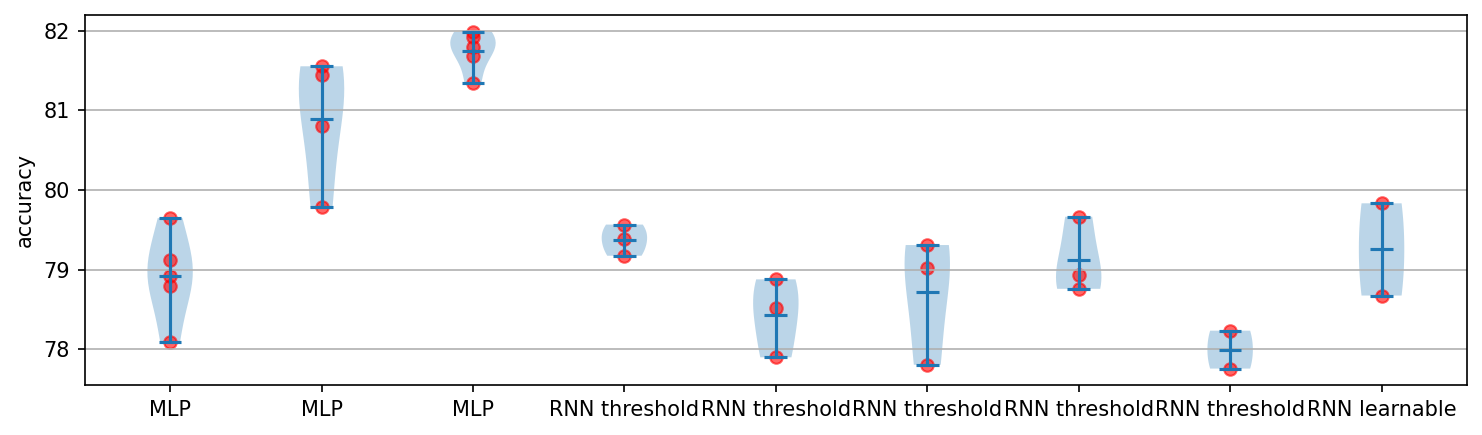

In [33]:
plt.figure(figsize=(10, 3), dpi=150)
accs = acc_mlp + acc_rnn_thresh + acc_rnn_learn + acc_rnn_reg
make_violin_plot(accs)

plt.xticks(range(len(accs)), ['MLP'] * len(acc_mlp) + 
           ['RNN threshold'] * len(acc_rnn_thresh) + 
           ['RNN learnable'] * len(acc_rnn_learn) + 
           ['RNN regression'] * len(acc_rnn_reg))
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(visible=True, axis='y')
#plt.savefig(os.path.join(result_dir, 'images/blob_violin'))

In [25]:
#model_name = 'covtype/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_first_correct/0802-092454'
model_name = 'covtype/rnn/_model_rnn_type_elman_model_stopping_criterion_first_correct/0802-211054'

model, loader = load_model(result_dir, model_name)
model.use_embedding = False

#clf = sklearn.tree.DecisionTreeClassifier(max_depth=10)
clf = sklearn.linear_model.LogisticRegression()
crit_estim = get_recurrence_estimator(model, loader, estimator=clf, verbose=True, standardize=True)

model.crit_estim = crit_estim
acc, ce, steps = evaluate(model, loader.valid)
print('accuracy:', acc)
print('number of nodes:', clf.tree_.node_count)

training estimator
testing estimator
recurrence estimator test accuracy: 0.718
accuracy: 71.56724487913067


AttributeError: 'LogisticRegression' object has no attribute 'tree_'

In [ ]:
model_name = 'covtype/rnn/_model_rnn_type_linear_model_stopping_criterion_first_correct/0802-163813'
model, loader = load_model(result_dir, model_name)
model.use_embedding = True

clf = sklearn.tree.DecisionTreeClassifier(max_depth=None)
crit_estim = get_recurrence_estimator(model, loader, estimator=clf, verbose=True)

model.crit_estim = crit_estim
acc, ce, steps = evaluate(model, loader.valid)
print('accuracy:', acc)
print('number of nodes:', clf.tree_.node_count)

tensor([1, 2, 3, 4, 5, 6, 7], device='cuda:0') tensor([59534, 39785, 28623,  2171,  7584, 13886, 16511])


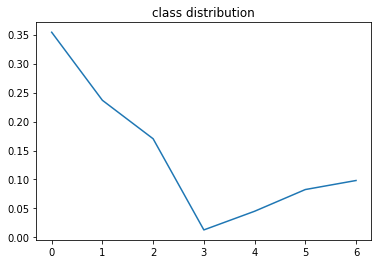

In [17]:
x_data, final_steps, label = get_final_steps_data(model, loader.train)

values, counts = torch.unique(label[final_steps == 1], return_counts=True)
counts = counts.cpu()
print(values, counts)
plt.plot(counts / torch.sum(counts))
plt.title('class distribution')
plt.show()

# Data Set Statistics

In [3]:
dataset = CovertypeDataset()

data, labels = dataset._get_data()

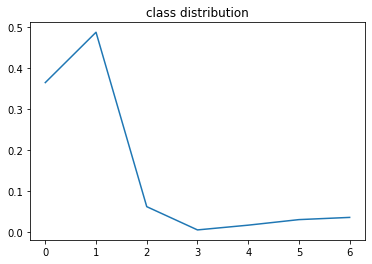

In [6]:
_, class_counts = torch.unique(labels, return_counts=True)
plt.plot(class_counts / torch.sum(class_counts))
plt.title('class distribution')
plt.show()

In [31]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, train_size=10000)
clf = sklearn.tree.DecisionTreeClassifier(max_depth=None)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print('accuracy of decision tree:', acc)

accuracy of decision tree: 0.7281966053252821


In [63]:
x_train, _, y_train = get_final_steps_data(model, loader.train)
x_test, _, y_test = get_final_steps_data(model, loader.test)
clf = sklearn.tree.DecisionTreeClassifier(max_depth=10)
clf.fit(x_train.cpu(), y_train.cpu())
acc = clf.score(x_test.cpu(), y_test.cpu())
print('accuracy of decision tree:', acc)
print('number of nodes:', clf.tree_.node_count)

accuracy of decision tree: 0.7733965517241379
number of nodes: 1563


In [ ]:
import scipy
scipy.stats.ttest_ind(acc_mlp3, acc_rnn1, equal_var=False)

In [28]:
make_table(result_dir, model_type='covtype/mlp')

\begin{center}
\begin{tabular}{ |c||c|c|c|c c|c c| }
\hline
 & & & & best & best & cheapest & cheapest \\
model & ACC & CE & OPS & ACC & OPS & ACC & OPS \\
\hline
_model_layer_dims_(16, 16) & 78.92 \pm  0.50 &  0.50 \pm  0.01 &  1248.00 \pm  0.00 &  79.65 &  1248.00 &  79.65 &  1248.00 \\
\hline
_model_layer_dims_(16, 16, 16) & 80.90 \pm  0.70 &  0.45 \pm  0.02 &  1504.00 \pm  0.00 &  81.56 &  1504.00 &  79.78 &  1504.00 \\
\hline
_model_layer_dims_(16, 16, 16, 16) & 81.75 \pm  0.22 &  0.43 \pm  0.00 &  1760.00 \pm  0.00 &  81.99 &  1760.00 &  81.69 &  1760.00 \\
\hline
\end{tabular}
\end{center}


In [ ]:
make_table(result_dir, model_type='covtype/mlp')